In [1]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [13]:
import os
img_file = 'images/사과.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [14]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [15]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [16]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents
    }
}

In [17]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [18]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [19]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"bowl","confidence":"0.897909","x":"8","y":"67","width":"184","height":"118"},{"class":"orange","confidence":"0.962452","x":"226","y":"193","width":"44","height":"45"},{"class":"orange","confidence":"0.926101","x":"236","y":"240","width":"41","height":"47"},{"class":"orange","confidence":"0.901847","x":"139","y":"235","width":"41","height":"49"},{"class":"orange","confidence":"0.865127","x":"270","y":"254","width":"49","height":"50"},{"class":"orange","confidence":"0.864499","x":"109","y":"220","width":"49","height":"50"},{"class":"orange","confidence":"0.739043","x":"196","y":"255","width":"48","height":"50"},{"class":"orange","confidence":"0.731478","x":"285","y":"226","width":"39","height":"35"},{"class":"orange","confidence":"0.680905","x":"317","y":"232","width":"40","height":"42"},{"class":"orange","confidence":"0.676537","x":"348","y":"187","width":"43","height":"40"},{"class":"orange","confidence":"0.665325","x":"101","y":"78","wi

In [20]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'bowl',
    'confidence': '0.897909',
    'x': '8',
    'y': '67',
    'width': '184',
    'height': '118'},
   {'class': 'orange',
    'confidence': '0.962452',
    'x': '226',
    'y': '193',
    'width': '44',
    'height': '45'},
   {'class': 'orange',
    'confidence': '0.926101',
    'x': '236',
    'y': '240',
    'width': '41',
    'height': '47'},
   {'class': 'orange',
    'confidence': '0.901847',
    'x': '139',
    'y': '235',
    'width': '41',
    'height': '49'},
   {'class': 'orange',
    'confidence': '0.865127',
    'x': '270',
    'y': '254',
    'width': '49',
    'height': '50'},
   {'class': 'orange',
    'confidence': '0.864499',
    'x': '109',
    'y': '220',
    'width': '49',
    'height': '50'},
   {'class': 'orange',
    'confidence': '0.739043',
    'x': '196',
    'y': '255',
    'width': '48',
    'height': '50'},
   {'class': 'orange',
    'confidence': '0.731478',
    'x': '285',
    'y': '226',
    

In [21]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt 
%matplotlib inline

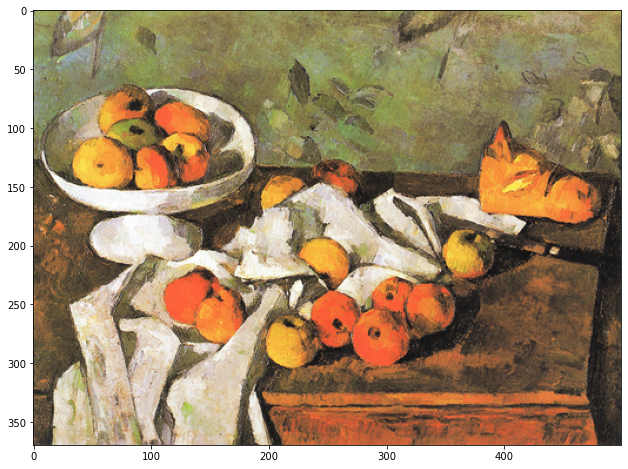

In [22]:
plt.figure(figsize=(12,8))
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [23]:
draw = ImageDraw.Draw(image)
obj_list = result['return_object']['data']
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)

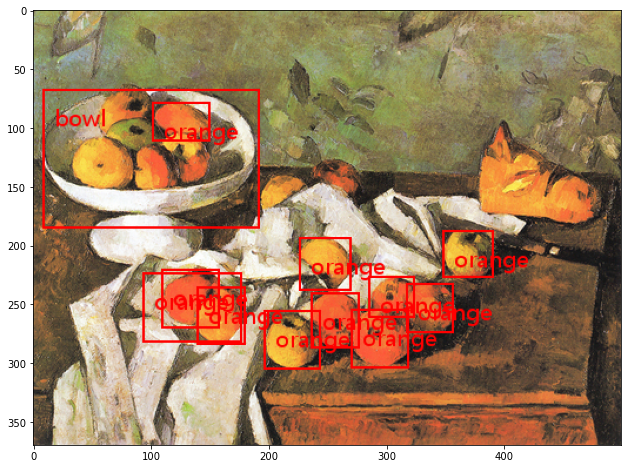

In [24]:
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()